# Plotting with Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_canada = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")
df_canada.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [13]:
df_canada = df_canada.replace('Latin America and the Caribbean', 'L-America')
df_canada['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'L-America',
       'Northern America'], dtype=object)

##### Count plot

<Axes: xlabel='Continent', ylabel='count'>

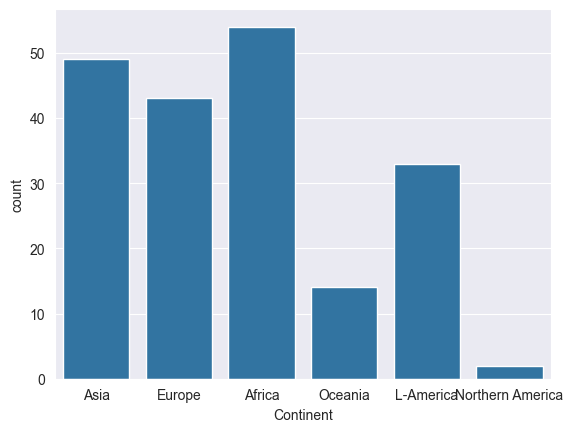

In [14]:
sns.countplot(x='Continent', data=df_canada)

##### Now Problem with 2 Name, We can rename them

In [15]:
df_can1 = df_canada.replace('Northern America', 'N-America')

##### Now again create the plot

<Axes: xlabel='Continent', ylabel='count'>

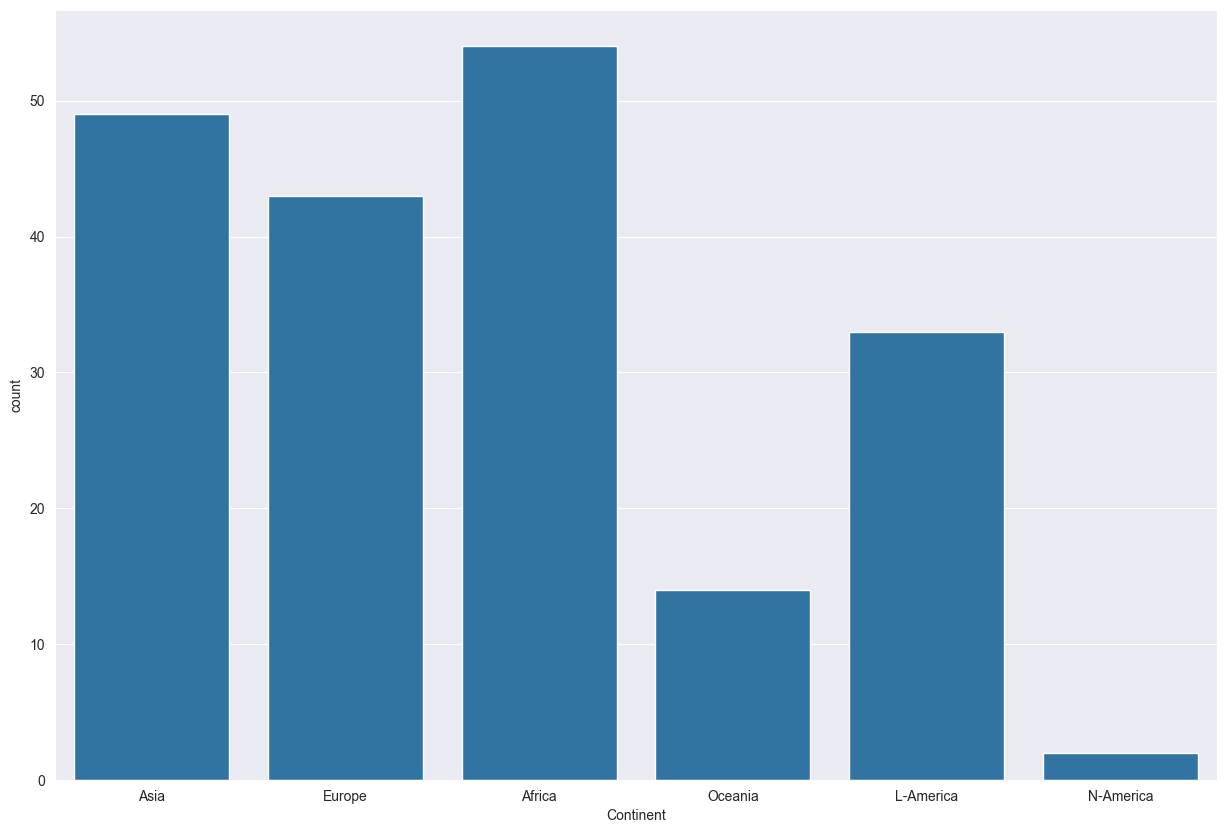

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

# Barplot

<Axes: xlabel='Continent', ylabel='Total'>

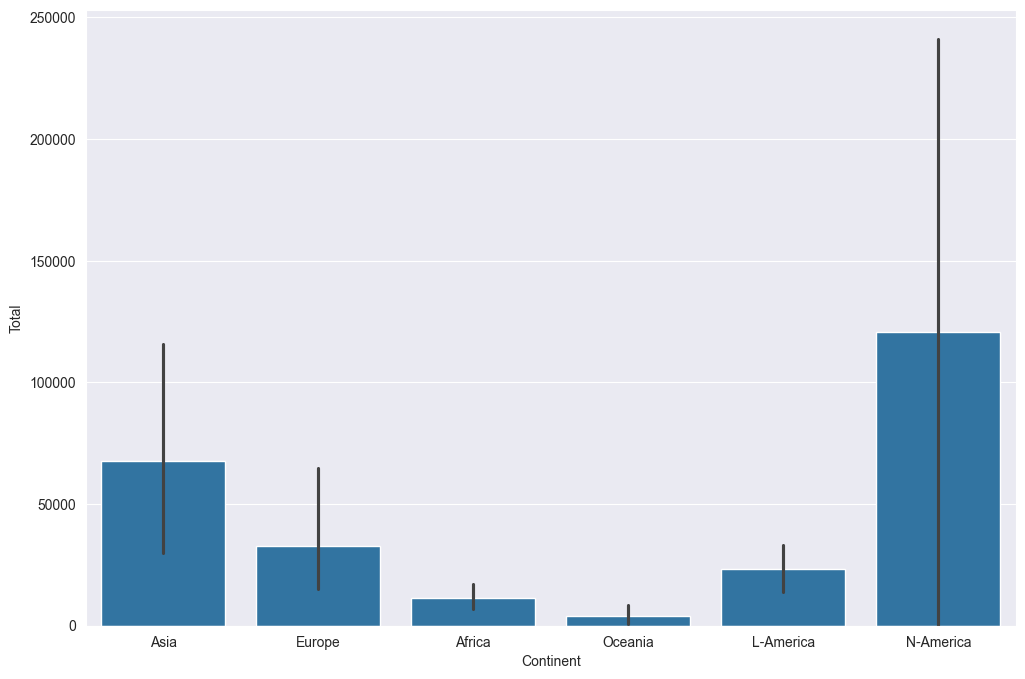

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Continent', y='Total', data=df_can1)

In [27]:
df_ca2 = df_can1.groupby('Continent')['Total'].mean()
df_ca2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

# Regression Plot

In [24]:
years = list(map(str, range(1980, 2014)))

In [28]:
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [36]:
# years back to float for regression
df_tot.index = map(float, df_tot.index)

In [37]:
df_tot.reset_index(inplace=True)

In [40]:
df_tot.columns = ['Year', 'Total']
df_tot.head()
# READY FOR RUN REGRESSION PLOT

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


# SHOW REGRESSION PLOT

<Axes: xlabel='Year', ylabel='Total'>

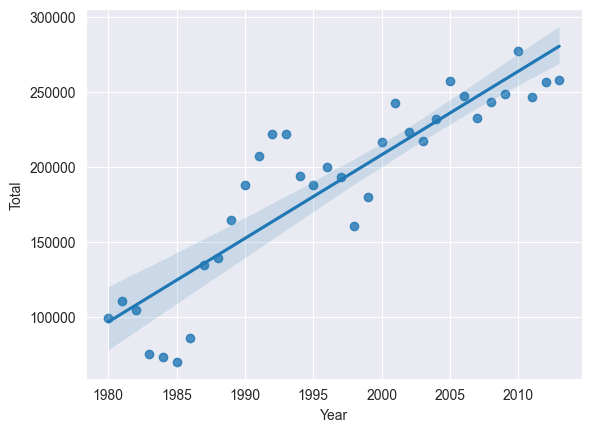

In [41]:
sns.regplot(x='Year', y='Total', data=df_tot)

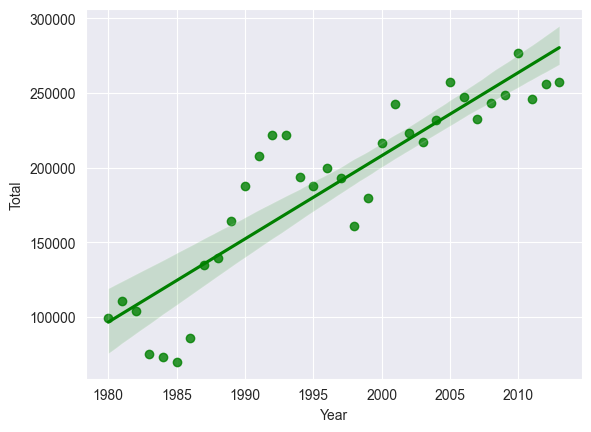

In [42]:
sns.regplot(x='Year', y='Total', data=df_tot, color='green')
plt.show()

# THE FONT, COLOR, BACKGROUND CHANGED AND FINALE OUTPUT

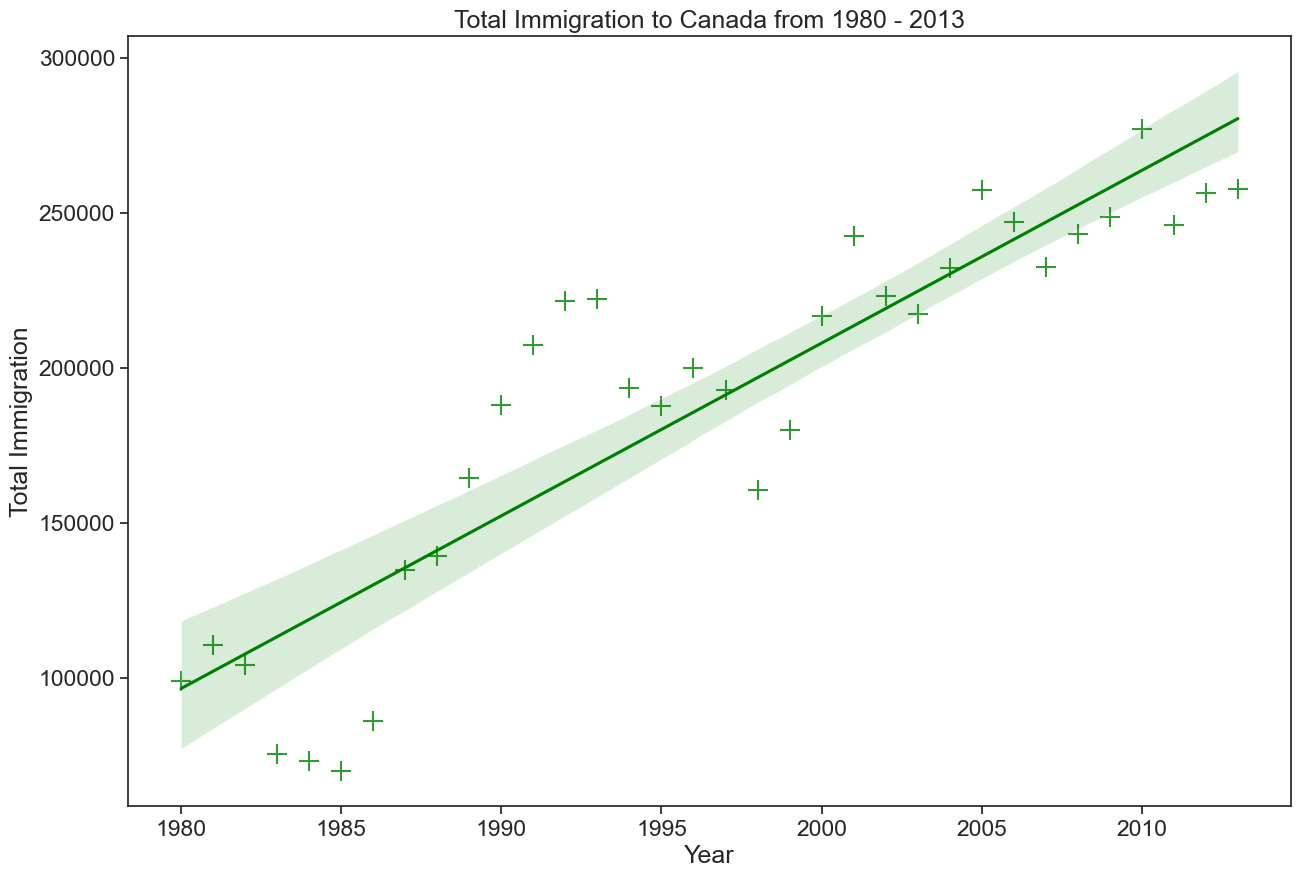

In [45]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='Year', y='Total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()